#Decision Tree Regression Model

Decision tree regression is a method used to predict a continuous target variable. Imagine you are trying to predict house prices based on features like size, number of rooms, and location. A decision tree helps you make these predictions by making a series of decisions based on these features.

### How Does it Work?

#### 1. Tree Structure

A decision tree is like a flowchart. Each step in this flowchart asks a question about the data, and based on the answer, it either makes a prediction or asks another question.

- **Root Node**: The starting point where the entire dataset is considered.
- **Internal Nodes**: Points where decisions are made based on a feature.
- **Leaf Nodes**: Endpoints that give a predicted value (like a house price).

#### 2. Splitting the Data

At each step (node) in the tree, the data is split into two groups. This split is based on a feature that best separates the data to minimize the difference within each group.

For example, you might start by asking if the house size is less than 2000 square feet:
- **Yes**: Go to the left branch.
- **No**: Go to the right branch.

#### 3. Choosing the Best Split

To find the best split, the algorithm looks at all possible splits for all features. It chooses the split that makes the data in each group as similar as possible. This similarity is measured by how close the actual target values (house prices) are to each other within the group.

#### 4. Recursive Splitting

The splitting process is repeated for each new group (subset of data):
- The left branch is split again based on another feature, say, the number of rooms.
- The right branch is split similarly, maybe based on location.

This process continues until it either cannot improve the separation or it reaches a predefined limit like the maximum depth of the tree.

#### 5. Making Predictions

When the tree cannot split further, the algorithm makes a prediction. For each leaf node, the prediction is usually the average of the target values (house prices) of the data points in that leaf.

The metrics used to determine the best split are designed to quantify this error or impurity. Here are the most common metrics used for splitting in decision tree regression:

### 1. Mean Squared Error (MSE)

**Definition**:
Mean Squared Error measures the average of the squares of the errors. The error is the difference between the actual value and the predicted value.

**Formula**:
$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y})^2 $

where:
- $ N $ is the number of samples.
- $ y_i $ is the actual target value for the $i^{th}$ sample.
- $ \hat{y} $ is the predicted value (mean of the target values in the node).

**Usage in Splitting**:
When evaluating potential splits, the algorithm calculates the MSE for each potential split. The split that results in the lowest combined MSE for the child nodes is chosen. This minimizes the average squared difference between actual and predicted values, leading to more accurate predictions.

### 2. Mean Absolute Error (MAE)

**Definition**:
Mean Absolute Error measures the average of the absolute differences between the actual values and the predicted values.

**Formula**:
$ \text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |y_i - \hat{y}| $

**Usage in Splitting**:
Similar to MSE, the algorithm evaluates potential splits based on MAE. The split that results in the lowest combined MAE for the child nodes is chosen. This metric is less sensitive to outliers compared to MSE, as it does not square the error terms.

### 3. Reduction in Variance

**Definition**:
Reduction in variance measures how much the variance of the target variable decreases after a split.

**Formula**:
The variance for a node is given by:
$ \text{Variance} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y})^2 $

where $ \bar{y} $ is the mean of the target values in the node. For a split, the reduction in variance is calculated as:

$ \Delta \text{Variance} = \text{Variance}_{\text{parent}} - \left( \frac{N_L}{N} \text{Variance}_L + \frac{N_R}{N} \text{Variance}_R \right) $

where:
- $ \text{Variance}_{\text{parent}} $ is the variance of the target variable in the parent node.
- $ \text{Variance}_L $ and $\text{Variance}_R $ are the variances in the left and right child nodes, respectively.
- $ N_L $ and $ N_R $ are the number of samples in the left and right child nodes.

**Usage in Splitting**:
The algorithm chooses the split that maximizes the reduction in variance. This means the split should create child nodes with lower variance compared to the parent node, indicating more homogeneity in the target values within each child node.

By using these metrics, decision tree regression seeks to create splits that result in the most accurate predictions for the target variable. The goal is to have child nodes where the target values are as close as possible to each other, thereby reducing the overall prediction error.


# Example

Predicting the salary of different salary level

In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import the data

data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

### Training the Decision Tree Model on the Whole Data

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

### Predicting a New Result

In [6]:
regressor.predict([[6.5]])

array([150000.])

### Visualizing the Decision Tree Regression results

The graphs in 2D for decision tree is not that explanatory, or helpful. It makes more sense for the higher dimensional data.

<ipython-input-9-61fdcbcf3d29>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


Text(0, 0.5, 'Salary')

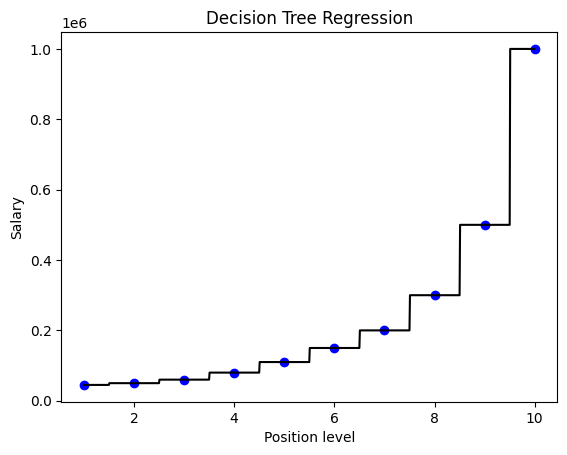

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'blue')
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')